In [5]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization
np.random.seed(1000)
import pathlib


In [ ]:
#dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
#data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)
#print(data_dir)
#data_dir = pathlib.Path(data_dir).with_suffix('')
#print(data_dir)

228813984/228813984 [==============================] - 2s 0us/step
/root/.keras/datasets/flower_photos.tar
/root/.keras/datasets/flower_photos


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/DeepLearningClasswork/CA1_dataset/Animals

/content/drive/My Drive/DeepLearningClasswork/CA1_dataset/Animals


In [7]:
data_dir="/content/drive/My Drive/DeepLearningClasswork/CA1_dataset/Animals"
print(data_dir)

/content/drive/My Drive/DeepLearningClasswork/CA1_dataset/Animals


VGG16

In [3]:
batch_size=12
img_height=224
img_width=224

In [8]:
train_ds=tf.keras.utils.image_dataset_from_directory(
    data_dir,validation_split=0.2,
    subset="training",
    seed=123, #the same set of images always go into the training, test, validation set.
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 170 files belonging to 6 classes.
Using 136 files for training.


In [9]:
val_ds=tf.keras.utils.image_dataset_from_directory(
    data_dir,validation_split=0.2,
    subset="validation",
    seed=123, #the same set of images always go into the training, test, validation set.
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 170 files belonging to 6 classes.
Using 34 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['Cheetah', 'Jaguar', 'Leopard', 'Lion', 'Tiger', 'datasets']


In [11]:
num_classes=len(class_names)

##VGG 16

In [12]:
#VGG16
model=Sequential()
#layer 1
model.add(Conv2D(filters=64,input_shape=(224,224,3),strides=(1,1),kernel_size=(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

#layer2
model.add(Conv2D(filters=128,input_shape=(112,112,128),kernel_size=(3,3),strides=(1,1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

#layer3
model.add(Conv2D(filters=256,input_shape=(56,56,256),kernel_size=(3,3),strides=(1,1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

#layer4
model.add(Conv2D(filters=512,input_shape=(28,28,512),kernel_size=(3,3),strides=(1,1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

#layer5
model.add(Conv2D(filters=512,input_shape=(14,14,512),kernel_size=(3,3),strides=(1,1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

#fully connected
model.add(Flatten())

#1st FC
model.add(Dense(25088))
model.add(Activation('relu'))

#2nd FC
model.add(Dense(4096))
model.add(Activation('relu'))
#dropout
#model.add(Dropout(0.4))

#3rd FC
model.add(Dense(4096))
model.add(Activation('relu'))
#dropout
#model.add(Dropout(0.4))

#output layer
model.add(Dense(1000))
model.add(Activation('softmax'))

In [13]:
#model compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #categorical clasification
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 activation (Activation)     (None, 222, 222, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 activation_1 (Activation)   (None, 108, 108, 128)     0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 128)      0         
 2D)                                                    

In [15]:
#model fit
epochs=4
history10 = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/4


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


12/12 [==============================] - 70s 2s/step - loss: 711.0164 - accuracy: 0.1985 - val_loss: 9.9067 - val_accuracy: 0.2353
Epoch 2/4
12/12 [==============================] - 2s 125ms/step - loss: 4.2679 - accuracy: 0.1838 - val_loss: 2.3087 - val_accuracy: 0.1765
Epoch 3/4
12/12 [==============================] - 2s 124ms/step - loss: 1.8307 - accuracy: 0.2279 - val_loss: 1.6877 - val_accuracy: 0.2647
Epoch 4/4
12/12 [==============================] - 2s 125ms/step - loss: 1.7212 - accuracy: 0.1985 - val_loss: 1.6868 - val_accuracy: 0.2353


accuracy: 67.30%

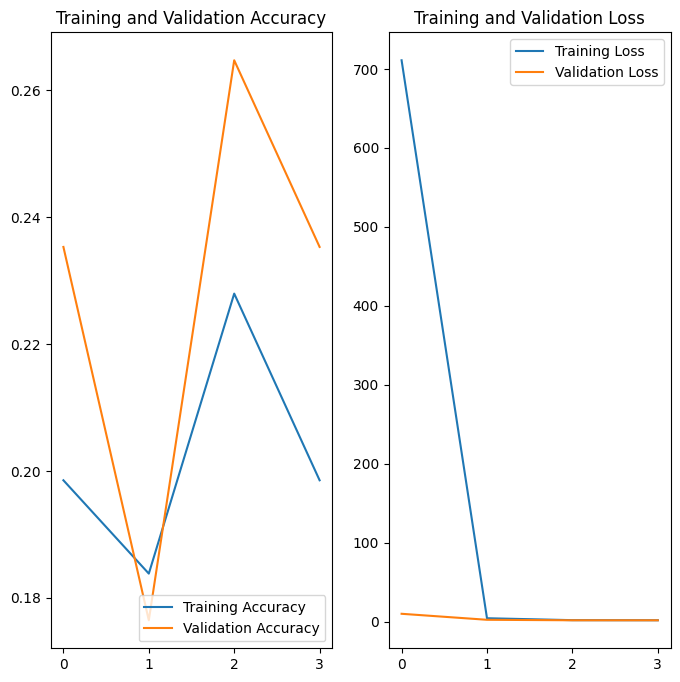

In [16]:
acc = history10.history['accuracy']
val_acc = history10.history['val_accuracy']
loss = history10.history['loss']
val_loss = history10.history['val_loss']
epochs_range=range(epochs)
plt.figure(figsize=(8,8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

31.5.23

##alexnet

In [17]:
batch_size=128
img_height=227
img_width=227

In [18]:
train_ds1=tf.keras.utils.image_dataset_from_directory(
    data_dir,validation_split=0.2,
    subset="training",
    seed=123, #the same set of images always go into the training, test, validation set.
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 170 files belonging to 6 classes.
Using 136 files for training.


In [19]:
class_names = train_ds1.class_names
print(class_names)

['Cheetah', 'Jaguar', 'Leopard', 'Lion', 'Tiger', 'datasets']


In [20]:
val_ds1=tf.keras.utils.image_dataset_from_directory(
    data_dir,validation_split=0.2,
    subset="validation",
    seed=123, #the same set of images always go into the training, test, validation set.
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 170 files belonging to 6 classes.
Using 34 files for validation.


In [21]:
num_classes=len(class_names)

In [22]:
model0=Sequential()
#layer 1
model0.add(Conv2D(filters=96,input_shape=(227,227,3),kernel_size=(11,11),strides=(4,4),padding='valid'))
model0.add(Activation("relu"))
model0.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='valid'))

#layer2
model0.add(Conv2D(filters=96,input_shape=(227,227,3),kernel_size=(5,5),strides=(1,1),padding='valid'))
model0.add(Activation("relu"))
model0.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='valid'))

#layer3
model0.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding='valid'))
model0.add(Activation("relu"))


#layer4
model0.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding='valid'))
model0.add(Activation("relu"))

#layer5
model0.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='valid'))
model0.add(Activation("relu"))

#final pooling
model0.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

#fully connected
model0.add(Flatten())

#1st FC
model0.add(Dense(4096, input_shape=(227*227*3,)))
model0.add(Activation('relu'))

#dropout to prevent overfitting
model0.add(Dropout(0.4))

#2nd FC
model0.add(Dense(4096))
model0.add(Activation('relu'))
#dropout
model0.add(Dropout(0.4))

#3rd FC
model0.add(Dense(1000))
model0.add(Activation('relu'))
#dropout
model0.add(Dropout(0.4))

#output layer
model0.add(Dense(num_classes))
model0.add(Activation('relu'))

In [23]:
#model compile
model0.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #categorical clasification
              metrics=['accuracy'])

In [24]:
model0.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 activation_9 (Activation)   (None, 55, 55, 96)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 23, 23, 96)        230496    
                                                                 
 activation_10 (Activation)  (None, 23, 23, 96)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 11, 11, 96)       0         
 2D)                                                  

In [25]:
#model fit
epochs=5
history0 = model0.fit(train_ds1, validation_data=val_ds1, epochs=epochs)

Epoch 1/5
2/2 [==============================] - 8s 920ms/step - loss: 7.4730 - accuracy: 0.1471 - val_loss: 1.7918 - val_accuracy: 0.0882
Epoch 2/5
2/2 [==============================] - 1s 168ms/step - loss: 2.2528 - accuracy: 0.2132 - val_loss: 1.7918 - val_accuracy: 0.0882
Epoch 3/5
2/2 [==============================] - 1s 172ms/step - loss: 1.7884 - accuracy: 0.2647 - val_loss: 1.7918 - val_accuracy: 0.0882
Epoch 4/5
2/2 [==============================] - 1s 330ms/step - loss: 1.7918 - accuracy: 0.2574 - val_loss: 1.7918 - val_accuracy: 0.0882
Epoch 5/5
2/2 [==============================] - 1s 339ms/step - loss: 1.7918 - accuracy: 0.2574 - val_loss: 1.7918 - val_accuracy: 0.0882


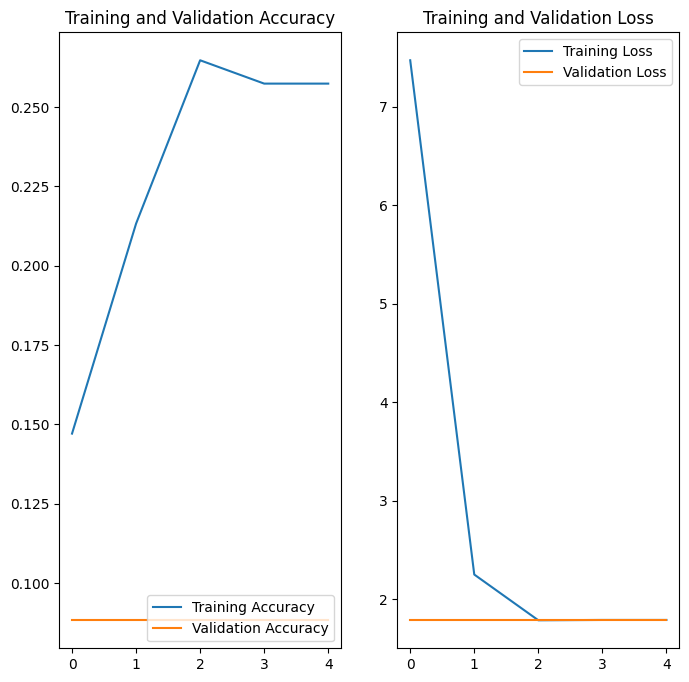

In [26]:
acc = history0.history['accuracy']
val_acc = history0.history['val_accuracy']
loss = history0.history['loss']
val_loss = history0.history['val_loss']
epochs_range=range(epochs)
plt.figure(figsize=(8,8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##INCEPTION PRETRAINED

In [27]:
batch_size=12
img_height=224
img_width=224

In [28]:
train_ds=tf.keras.utils.image_dataset_from_directory(
    data_dir,validation_split=0.2,
    subset="training",
    seed=123, #the same set of images always go into the training, test, validation set.
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 170 files belonging to 6 classes.
Using 136 files for training.


In [29]:
val_ds=tf.keras.utils.image_dataset_from_directory(
    data_dir,validation_split=0.2,
    subset="validation",
    seed=123, #the same set of images always go into the training, test, validation set.
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 170 files belonging to 6 classes.
Using 34 files for validation.


In [30]:
#cheching the batch_size of training dataset
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(12, 224, 224, 3)
(12,)


In [31]:
normalization_layer = layers.Rescaling(1./255) #255 is constant pixel value

In [32]:
num_classes=print(len(class_names))

6


In [33]:
#model create (
#num_classes = len(class_names)
#model = Sequential([
#    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)), #input layer includes normalisation, ,sizes, color indication
#   layers.Conv2D(16, 3, padding='same', activation='relu'), #convolution layer    #16 - no. of filters,  3 - 3X3 filter size
#   layers.MaxPooling2D(), #pooling layer
#    layers.Conv2D(32, 3, padding='same', activation='relu'), #convolution layer    #32 - no. of filters,  3 - 3X3 filter size
#    layers.MaxPooling2D(), #pooling layer   #it is "2D" based on the dimention of the input image    #"1D" Pooling-text,  #"3D" pooling-3D images
#    layers.Conv2D(64, 3, padding='same', activation='relu'), #convolution layer    #64 - no. of filters,  3 - 3X3 filter size
#   layers.MaxPooling2D(), #pooling layer
#   layers.Flatten(), #converting the data into single-vector
#   layers.Dense(128, activation='relu'), #hidden layer1 with 128 neurons
#   layers.Dense(256, activation='relu'), #hidden layer2 with 256 neurons
#   layers.Dense(num_classes) #output layer  #num_classes gives me how many output layer i want.  i.,e = 5 .
#])

In [ ]:
#model compile
#model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='adam', metrics=['accuracy'])

In [34]:
#inceptionv3 model - pretrained
InceptionV3_model=tf.keras.applications.InceptionV3(weights='imagenet',include_top=False,input_shape=(224,224,3))

87910968/87910968 [==============================] - 5s 0us/step


In [35]:
from keras.models import Model

In [36]:
for layer in InceptionV3_model.layers[:-15]:
  layer.trainable = False
x=InceptionV3_model.output
x=GlobalAveragePooling2D()(x)
x=Flatten()(x)
x=Dense(units=512,activation='softmax')(x)
x=Dropout(0.3)(x)
x=Dense(units=512,activation='softmax')(x)
x=Dropout(0.3)(x)
output=Dense(units=5,activation='softmax')(x)
model=Model(InceptionV3_model.input, output)


In [37]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_10 (Conv2D)             (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d_10[0][0]']              
 alization)                     )                                                             

In [38]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='adam', metrics=['accuracy'])

In [39]:
epochs=5
history=model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/5
12/12 [==============================] - 14s 429ms/step - loss: 1.6096 - accuracy: 0.1544 - val_loss: 1.6102 - val_accuracy: 0.0882
Epoch 2/5
12/12 [==============================] - 1s 59ms/step - loss: 1.6084 - accuracy: 0.2500 - val_loss: 1.6122 - val_accuracy: 0.0882
Epoch 3/5
12/12 [==============================] - 1s 59ms/step - loss: 1.6068 - accuracy: 0.2574 - val_loss: 1.6134 - val_accuracy: 0.0882
Epoch 4/5
12/12 [==============================] - 1s 60ms/step - loss: 1.6061 - accuracy: 0.2574 - val_loss: 1.6138 - val_accuracy: 0.0882
Epoch 5/5
12/12 [==============================] - 1s 60ms/step - loss: 1.6052 - accuracy: 0.2574 - val_loss: 1.6153 - val_accuracy: 0.0882


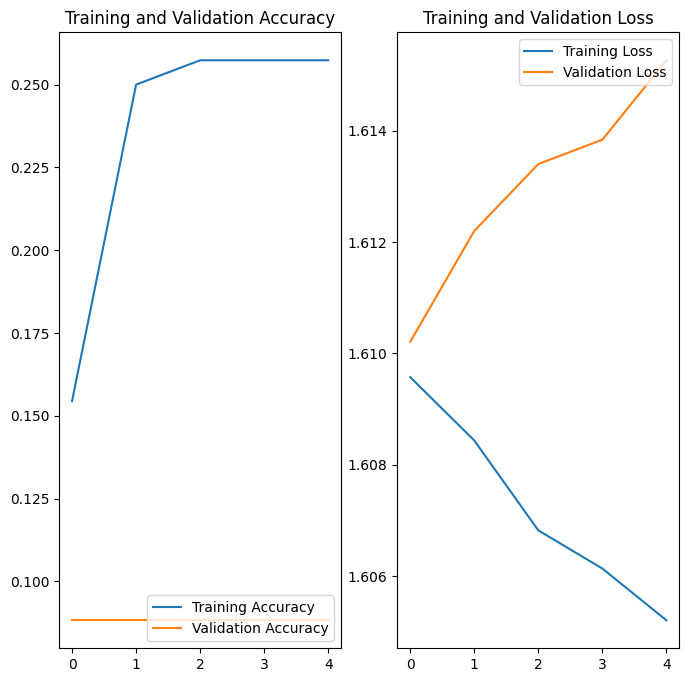

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range=range(epochs)
plt.figure(figsize=(8,8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##VGG16

In [41]:
pretrained_model=tf.keras.applications.VGG16(input_shape = (224,224, 3),
                        include_top = False,
                        weights ='imagenet')

58889256/58889256 [==============================] - 4s 0us/step


In [42]:
for layer in pretrained_model.layers[:-15]:
  layer.trainable = False
x=pretrained_model.output
x=GlobalAveragePooling2D()(x)
x=Flatten()(x)
x=Dense(units=512,activation='softmax')(x)
x=Dropout(0.3)(x)
x=Dense(units=512,activation='softmax')(x)
x=Dropout(0.3)(x)
output=Dense(units=5,activation='softmax')(x)
model=Model(pretrained_model.input, output)

In [43]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='adam', metrics=['accuracy'])

In [44]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [45]:
epochs=5
history1=history=model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/5
12/12 [==============================] - 16s 537ms/step - loss: 1.6090 - accuracy: 0.2132 - val_loss: 1.6109 - val_accuracy: 0.2353
Epoch 2/5
12/12 [==============================] - 3s 196ms/step - loss: 1.6078 - accuracy: 0.2279 - val_loss: 1.6127 - val_accuracy: 0.0882
Epoch 3/5
12/12 [==============================] - 3s 165ms/step - loss: 1.6066 - accuracy: 0.2647 - val_loss: 1.6141 - val_accuracy: 0.0882
Epoch 4/5
12/12 [==============================] - 2s 164ms/step - loss: 1.6056 - accuracy: 0.2574 - val_loss: 1.6162 - val_accuracy: 0.0882
Epoch 5/5
12/12 [==============================] - 2s 163ms/step - loss: 1.6047 - accuracy: 0.2574 - val_loss: 1.6174 - val_accuracy: 0.0882


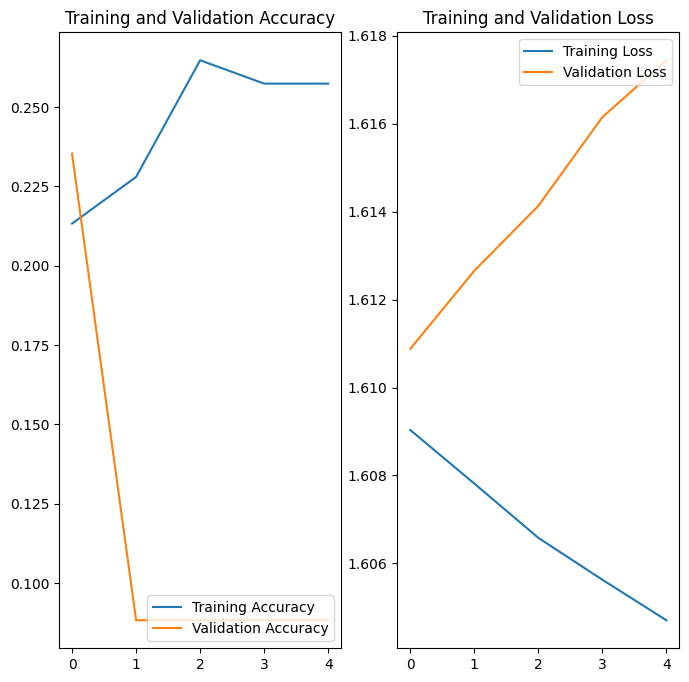

In [46]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs_range=range(epochs)
plt.figure(figsize=(8,8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##VGG19

In [47]:
pretrained_model1=tf.keras.applications.VGG19(input_shape = (224,224,3),
                        include_top = False,
                        weights ='imagenet')

80134624/80134624 [==============================] - 4s 0us/step


In [48]:
for layer in pretrained_model1.layers[:-15]:
  layer.trainable = False
x=pretrained_model1.output
x=GlobalAveragePooling2D()(x)
x=Flatten()(x)
x=Dense(units=512,activation='softmax')(x)
x=Dropout(0.3)(x)
x=Dense(units=512,activation='softmax')(x)
x=Dropout(0.3)(x)
output=Dense(units=5,activation='softmax')(x)
model=Model(pretrained_model1.input, output)

In [49]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='adam', metrics=['accuracy'])

In [50]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [51]:
epochs=5
history1=history=model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/5
12/12 [==============================] - 9s 243ms/step - loss: 1.6095 - accuracy: 0.1985 - val_loss: 1.6104 - val_accuracy: 0.2353
Epoch 2/5
12/12 [==============================] - 3s 178ms/step - loss: 1.6082 - accuracy: 0.2353 - val_loss: 1.6122 - val_accuracy: 0.0882
Epoch 3/5
12/12 [==============================] - 2s 179ms/step - loss: 1.6071 - accuracy: 0.2574 - val_loss: 1.6135 - val_accuracy: 0.0882
Epoch 4/5
12/12 [==============================] - 2s 180ms/step - loss: 1.6061 - accuracy: 0.2574 - val_loss: 1.6149 - val_accuracy: 0.0882
Epoch 5/5
12/12 [==============================] - 2s 180ms/step - loss: 1.6053 - accuracy: 0.2574 - val_loss: 1.6161 - val_accuracy: 0.0882


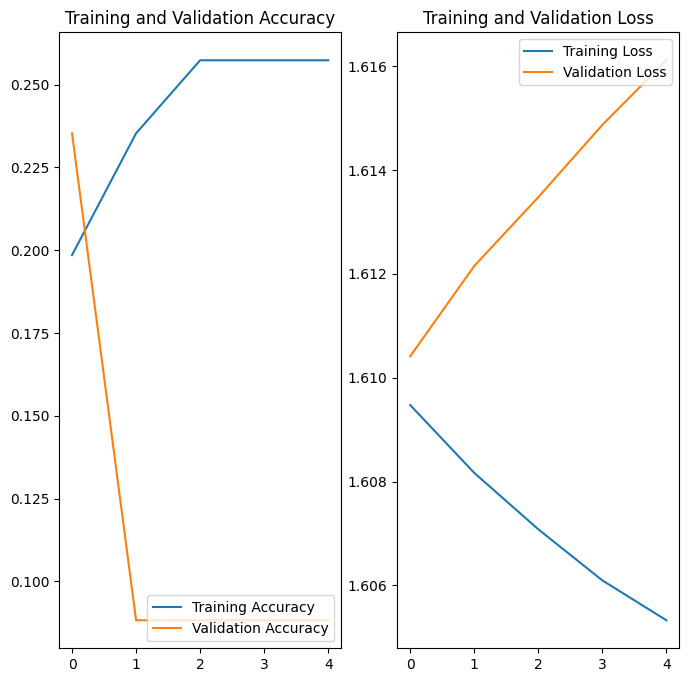

In [52]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs_range=range(epochs)
plt.figure(figsize=(8,8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##RESNET50

In [53]:
import cv2
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as k
from keras.models import Model, load_model
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint
from google.colab.patches import cv2_imshow
from keras.layers import Input, Dense,Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from keras.preprocessing import image
from keras.initializers import  glorot_uniform

In [54]:
img_height,img_width = 224,224
num_classes=5
#if imgaenet weights are being loaded
#input must have a static square shape(one of (128,128),(160,160),(192,192)or(224,224))

In [55]:
base_model=tf.keras.applications.ResNet50(weights=None, include_top=False,input_shape=(img_height,img_width,3))

In [56]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dropout(0.7)(x)
output=Dense(units=5,activation='softmax')(x)
model=Model(base_model.input, output)

In [57]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='adam', metrics=['accuracy'])

In [58]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [59]:
epochs=5
history1=history=model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/5
12/12 [==============================] - 48s 414ms/step - loss: 3.9195 - accuracy: 0.2574 - val_loss: 59076.2188 - val_accuracy: 0.2353
Epoch 2/5
12/12 [==============================] - 2s 161ms/step - loss: 3.0452 - accuracy: 0.2059 - val_loss: 54353.2656 - val_accuracy: 0.0882
Epoch 3/5
12/12 [==============================] - 3s 196ms/step - loss: 2.5871 - accuracy: 0.2206 - val_loss: 7204.2676 - val_accuracy: 0.1765
Epoch 4/5
12/12 [==============================] - 2s 155ms/step - loss: 2.4525 - accuracy: 0.2279 - val_loss: 19227.0039 - val_accuracy: 0.1765
Epoch 5/5
12/12 [==============================] - 2s 158ms/step - loss: 2.1915 - accuracy: 0.3529 - val_loss: 3952.4941 - val_accuracy: 0.1765


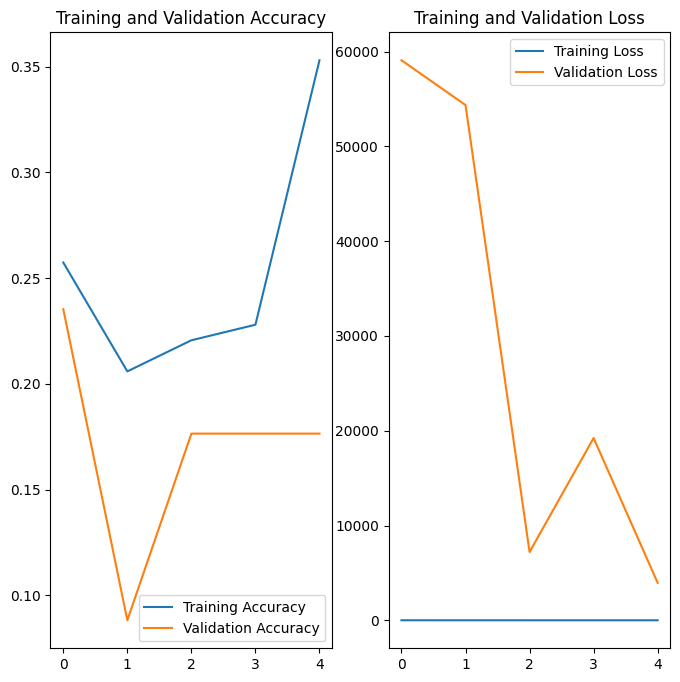

In [60]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs_range=range(epochs)
plt.figure(figsize=(8,8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#GoogLeNet
conv2d+max+conv2d+max+flatten+dense